In [2]:
!pip install numpy pandas scikit-learn matplotlib seaborn 

  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl.metadata (59 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp39-cp39-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   -------- ------------------------------- 2

In [3]:
import numpy as np 
import pandas as pd

df=pd.read_csv("spam.csv", encoding= "ISO-8859-1")

df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
df.drop(['Unnamed: 3',"Unnamed: 2","Unnamed: 4"],axis=1, inplace=True)

In [7]:
df.sample(5)

,v1,v2
614,ham,I called and said all to him:)then he have to ...
2662,spam,Hello darling how are you today? I would love ...
139,ham,Got c... I lazy to type... I forgot Ì_ in lect...
957,ham,Welp apparently he retired
2739,ham,Are you this much buzy


In [9]:
df.rename(columns={"v1":"target","v2":"text"},inplace=True)


In [10]:
df.sample(5)

,target,text
166,spam,URGENT! We are trying to contact you. Last wee...
4577,spam,Urgent! call 09066350750 from your landline. Y...
3850,ham,We have all rounder:)so not required:)
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...
4987,ham,Which channel:-):-):):-).


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["target"]=encoder.fit_transform(df["target"])


In [14]:
df.sample(5)

,target,text
4429,0,Yar lor... How u noe? U used dat route too?
4285,0,Congrats. That's great. I wanted to tell you n...
4754,0,U wan 2 haf lunch i'm in da canteen now.
399,0,Hmmm...k...but i want to change the field quic...
1890,0,Ok but knackered. Just came home and went to s...


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

np.int64(403)

In [17]:
df=df.drop_duplicates(keep="first")

In [18]:
df.shape

(5169, 2)

ValueError: 'label' must be of length 'x'

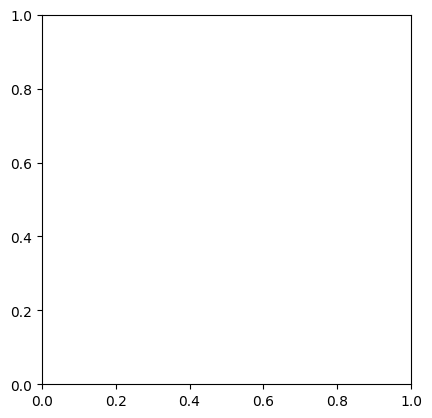

In [ ]:
#this work roperly on colab
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham,spam'],autopct="%0.2f")
plt.show()

In [22]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

   ---------------------------------------- 0/4 [tqdm]
   ---------- ----------------------------- 1/4 [regex]
   ---------- ----------------------------- 1/4 [regex]
   -------------------- ------------------- 2/4 [click]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
   ------------------------------ --------- 3/4 [nltk]
  

In [23]:
import nltk
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [24]:
df["num_characters"]=df["text"].apply(len)

C:\Users\ritik\AppData\Local\Temp\ipykernel_17088\3309080630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_characters"]=df["text"].apply(len)


In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\ritik\AppData\Local\Temp\ipykernel_17088\1118471538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\ritik\AppData\Local\Temp\ipykernel_17088\4263227907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))


In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


#Data PreProcessing 

1.lowercase
2.tokenizer
3.remove special char
4.stopword removal
5.puncuatiin
6.stemming


In [34]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
import string 

In [47]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text=y[:]

    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

        text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [48]:
print(transform_text("define how to students tell us classifcation about each other"))

defin student tell us classifc


In [49]:
df["tranform_text"]=df["text"].apply(transform_text)

C:\Users\ritik\AppData\Local\Temp\ipykernel_17088\3817822910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tranform_text"]=df["text"].apply(transform_text)


In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#Model Building 

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv=CountVectorizer()
tfidf=TfidfVectorizer()



In [56]:
x=tfidf.fit_transform(df['tranform_text']).toarray()

y=df["target"].values


In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [69]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8607350096711799
[[778 121]
 [ 23 112]]
0.48068669527896996


In [74]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9535783365570599
[[894   5]
 [ 43  92]]
0.9484536082474226


In [73]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9535783365570599
[[894   5]
 [ 43  92]]
0.9484536082474226


In [79]:
import pickle
pickle.dump(tfidf,open("vector.pkl",'wb'))
pickle.dump(mnb,open("model.pkl",'wb'))